In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


nltk.download('punkt')
nltk.download('stopwords')


data = pd.read_csv('nonnull_poems.csv')
print("Podgląd danych:")
data = data.rename(columns={
    "Title": "title",
    "Author": "author",
    "Content": "content",
    "Motywy": "motifs",
    "Forma": "form",
    "Typ rymu": "rhyme",
    "Słowa kluczowe": "keywords"
})
print(data.head(5))

Podgląd danych:
   Unnamed: 0                                            title  \
0           0                    [Ach! rzucić sieci zdarte...]   
1           1                                 A co wam śpiewać   
2           2  Pieśń II, 3 (Aequam memento rebus in arduis...)   
3           3   Pieśń I, 30 (O Venus regina Cnidi Paphique...)   
4           4      A jednak ja nie wątpię - bo się pora zbliża   

             author                                            content  \
0    Tristan Derème  \nPoeta, Kondycja ludzkaAch! rzucić sieci zdar...   
1  Maria Konopnicka  A co wam śpiewać, laleczki?\nBo umiem różne pi...   
2            Horacy  \nŚmierć, SpokójPomnij zachować umysł niezachw...   
3            Horacy  O Wenus! Knidu i Pafii królowo,\nPorzuć Cypr u...   
4  Juliusz Słowacki  \nBóg, Chrystus, Cierpienie, Ojczyzna, TrupA j...   

                                              motifs    form         rhyme  \
0                                       Nieokreślone  Wiersz  Ni

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# PODSTAWY
print("\nBrakujące wartości w kolumnach:")
print(data.isnull().sum())
print("\nInformacje o danych:")
print(data.info())


Brakujące wartości w kolumnach:
Unnamed: 0       0
title            0
author           0
content          0
motifs           0
form             0
rhyme            0
keywords         0
motifs_list      0
keywords_list    0
dtype: int64

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3814 non-null   int64 
 1   title          3814 non-null   object
 2   author         3814 non-null   object
 3   content        3814 non-null   object
 4   motifs         3814 non-null   object
 5   form           3814 non-null   object
 6   rhyme          3814 non-null   object
 7   keywords       3814 non-null   object
 8   motifs_list    3814 non-null   object
 9   keywords_list  3814 non-null   object
dtypes: int64(1), object(9)
memory usage: 298.1+ KB
None


In [17]:
# AUTORZY
unique_authors = data['author'].nunique()
print(f"\nLiczba unikalnych autorów: {unique_authors}")

top_authors = data['author'].value_counts().head(10)
print("\nNajczęściej występujący autorzy:")
print(top_authors)


Liczba unikalnych autorów: 195

Najczęściej występujący autorzy:
author
Bolesław Leśmian                  237
Maria Konopnicka                  235
Krzysztof Kamil Baczyński         158
Bianka Rolando                    125
Józef Czechowicz                  112
Eugeniusz Tkaczyszyn-Dycki         97
Maria Pawlikowska-Jasnorzewska     95
Jerzy Liebert                      92
Adam Mickiewicz                    90
Kazimierz Przerwa-Tetmajer         86
Name: count, dtype: int64


In [18]:
# FORMY
unique_forms = data['form'].nunique()
print(f"\nLiczba unikalnych form literackich: {unique_forms}")

form_counts = data['form'].value_counts()
print("\nRozkład form literackich:")
print(form_counts)


Liczba unikalnych form literackich: 9

Rozkład form literackich:
form
Wiersz          2167
Oda             1328
Pieśń            175
Sonet             73
Epigram           53
Wiersz wolny      11
Elegia             3
Epopeja            2
Fraszka            2
Name: count, dtype: int64



Liczba unikalnych motywów: 14

Najczęściej występujące motywy:
Natura: 1570
Nieokreślone: 923
Przemijanie: 889
Miłość: 802
Śmierć: 669
Bóg: 666
Cierpienie: 634
Radość: 568
Rodzina: 473
Wojna: 246

Motywy w zależności od formy literackiej:
              Nieokreślone  Śmierć  Natura  Przemijanie  Miłość    Bóg  \
form                                                                     
Elegia                 0.0     1.0     1.0          1.0     1.0    1.0   
Epigram               45.0     0.0     2.0          0.0     2.0    0.0   
Epopeja                0.0     0.0     1.0          2.0     1.0    1.0   
Fraszka                0.0     0.0     2.0          2.0     1.0    1.0   
Oda                  189.0   319.0   680.0        397.0   349.0  323.0   
Pieśń                 20.0    45.0   107.0         60.0    58.0   54.0   
Sonet                 21.0    10.0    25.0          5.0    11.0    9.0   
Wiersz               648.0   289.0   744.0        418.0   371.0  273.0   
Wiersz wolny        

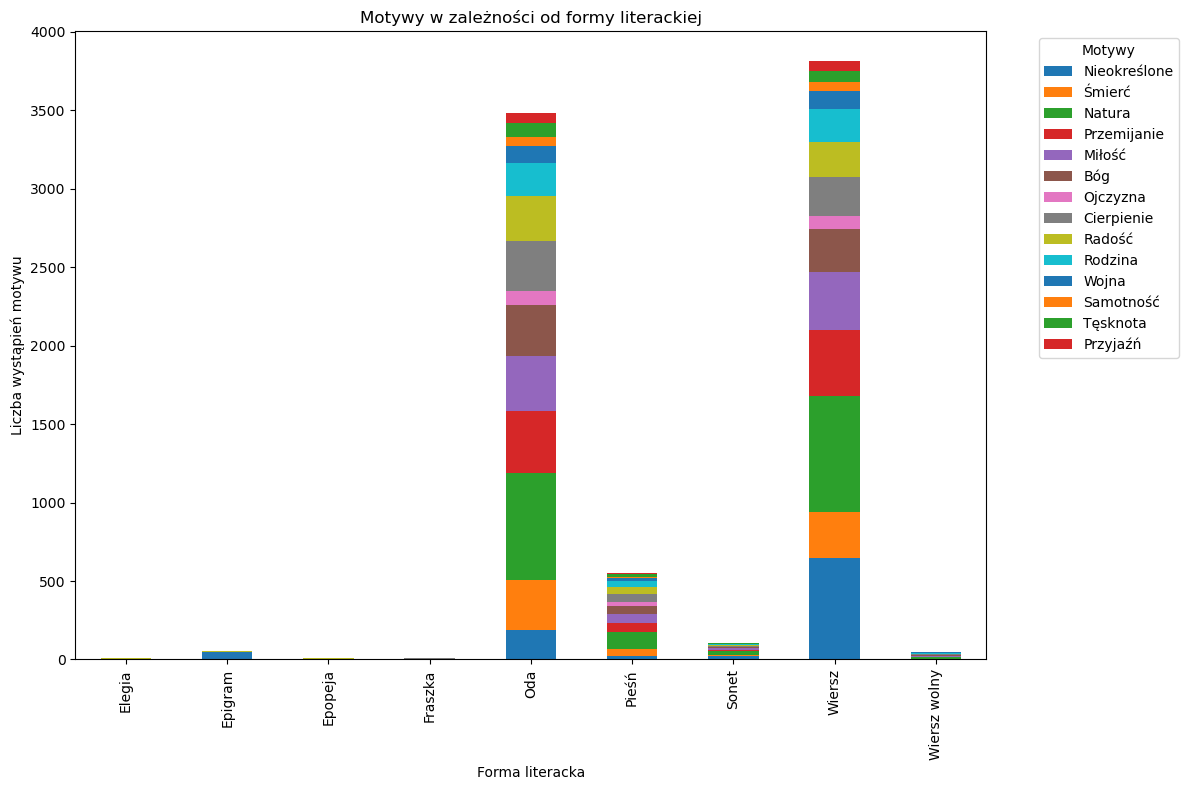

In [19]:
# MOTYWY
data['motifs_list'] = data['motifs'].fillna('').apply(lambda x: [motif.strip() for motif in x.split(',')])
all_motifs = [motif for sublist in data['motifs_list'] for motif in sublist if motif]
unique_motifs = set(all_motifs)
print(f"\nLiczba unikalnych motywów: {len(unique_motifs)}")

motif_counts = Counter(all_motifs)
top_motifs = motif_counts.most_common(10)
print("\nNajczęściej występujące motywy:")
for motif, count in top_motifs:
    print(f"{motif}: {count}")

# ZALEŻNOŚCI
motifs_matrix = data['motifs_list'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
motifs_matrix['form'] = data['form']
motifs_by_form = motifs_matrix.groupby('form').sum()
print("\nMotywy w zależności od formy literackiej:")
print(motifs_by_form)

motifs_by_form.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Motywy w zależności od formy literackiej')
plt.xlabel('Forma literacka')
plt.ylabel('Liczba wystąpień motywu')
plt.legend(title='Motywy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
# SŁOWA KLUCZOWE
data['keywords_list'] = data['keywords'].fillna('').apply(lambda x: [kw.strip() for kw in x.split(',')])
all_keywords = [kw for sublist in data['keywords_list'] for kw in sublist if kw]
keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(10)
print("\nNajczęściej występujące słowa kluczowe:")
for kw, count in top_keywords:
    print(f"{kw}: {count}")


Najczęściej występujące słowa kluczowe:
Brak słów kluczowych: 1336
czas: 212
mnie: 205
miłość: 197
śmierć: 191
bóg: 188
łzy: 128
kiedy: 117
jeszcze: 110
tylko: 110


In [22]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True


Statystyki opisowe długości tekstu:
count    3814.000000
mean      208.793655
std       332.070482
min         1.000000
25%        84.000000
50%       130.000000
75%       219.000000
max      7389.000000
Name: word_count, dtype: float64


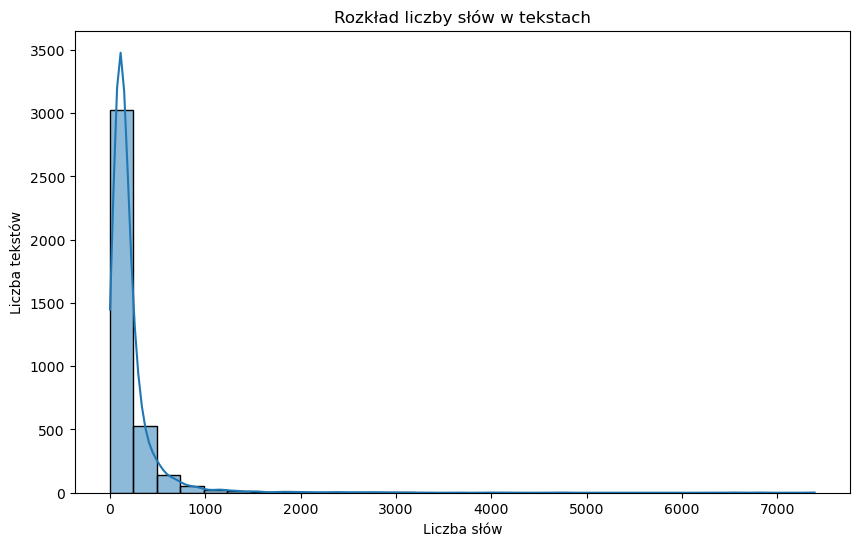

In [23]:
# TEKSTY
def word_count(text):
    tokens = word_tokenize(text)
    return len(tokens)

data['word_count'] = data['content'].apply(word_count)
print("\nStatystyki opisowe długości tekstu:")
print(data['word_count'].describe())

plt.figure(figsize=(10,6))
sns.histplot(data['word_count'], bins=30, kde=True)
plt.title('Rozkład liczby słów w tekstach')
plt.xlabel('Liczba słów')
plt.ylabel('Liczba tekstów')
plt.show()


Najczęściej występujące słowa w korpusie:
a: 5471
za: 2532
nad: 1405
ja: 1372
gdzie: 1365
tylko: 1362
pod: 1344
bo: 1268
jeszcze: 1199
ma: 1187
lecz: 1180
ty: 1179
jej: 1109
bez: 1047
ich: 979
nas: 935
kiedy: 930
ci: 923
wszystko: 904
tym: 885


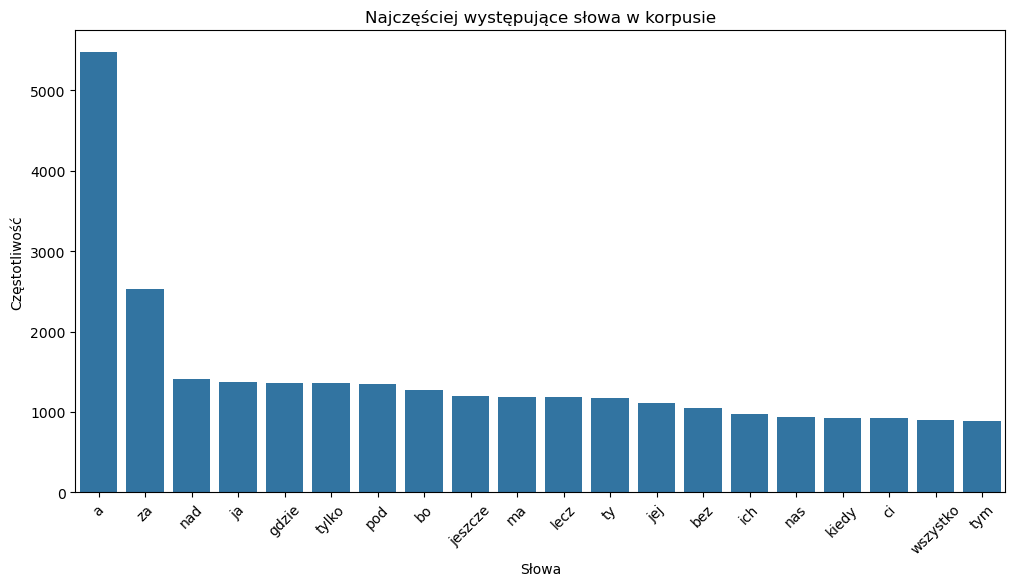

In [28]:

# SŁOWA + KLUCZOWE
all_text = ' '.join(data['content'].dropna())
translator = str.maketrans('', '', string.punctuation)
all_text_clean = all_text.translate(translator)
tokens = word_tokenize(all_text_clean.lower())
polish_stopwords = {
    "się", "i", "w", "z", "na", "o", "do", "jest", "to", "nie", "że", "co", "tak", "jak", "ale",
    "czy", "też", "już", "dla", "przez", "być", "gdy", "albo", "jeśli", "który", "które", "któryś",
    "czyli", "więc", "mnie", "mi", "od", "ten", "ta", "tu", "tam", "po", "czy", "by", "aż", "ze"
}

tokens_clean = [word for word in tokens if word not in polish_stopwords and word.isalpha()]

word_freq = Counter(tokens_clean)
most_common_words = word_freq.most_common(20)
print("\nNajczęściej występujące słowa w korpusie:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

words, frequencies = zip(*most_common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(frequencies))
plt.title('Najczęściej występujące słowa w korpusie')
plt.xlabel('Słowa')
plt.ylabel('Częstotliwość')
plt.xticks(rotation=45)
plt.show()


Rozkład typów rymów:
rhyme
Nieregularne         3344
Niedokładne rymy      238
Nieregularne rymy     222
Brak rymów             10
Name: count, dtype: int64


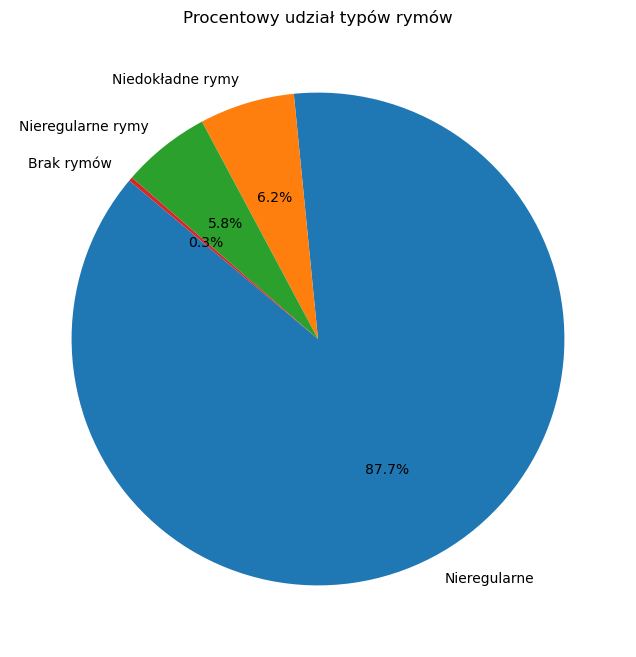

In [30]:
# RYMY
rhyme_counts = data['rhyme'].value_counts()
print("\nRozkład typów rymów:")
print(rhyme_counts)

plt.figure(figsize=(8,8))
rhyme_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Procentowy udział typów rymów')
plt.ylabel('')
plt.show()

# Klasyfikacja typów rymu
Ewidentnie jest bez sensu, struktura polskich wierszy sprawia problemy, jedyne rozwiązanie to ręczne oznakowanie. (po próbce klasyfikacji 10 wierszy - całkowity czas przetworzenia 3977 wierszy to ok. 20-30h)

In [31]:
data = data.drop(columns=['rhyme'])

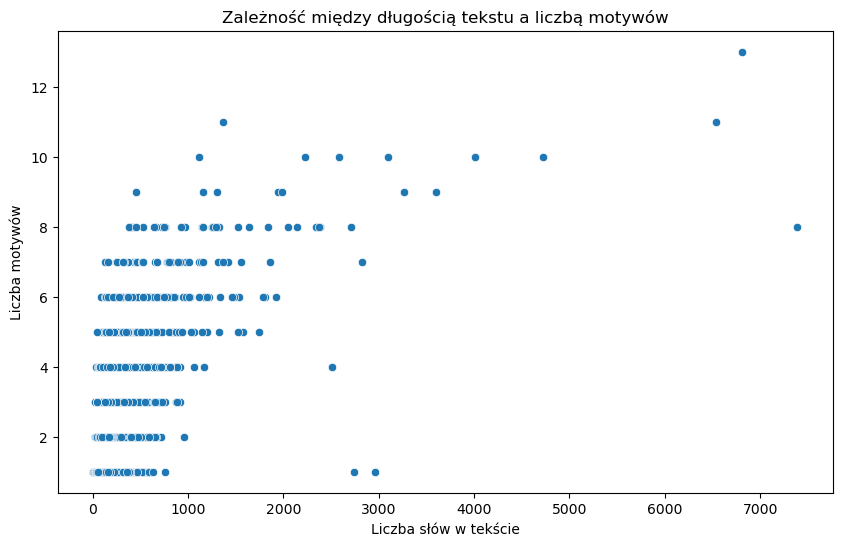


Współczynnik korelacji Pearsona między długością tekstu a liczbą motywów: 0.59


In [33]:
data['motifs_count'] = data['motifs_list'].apply(len)
plt.figure(figsize=(10,6))
sns.scatterplot(x='word_count', y='motifs_count', data=data)
plt.title('Zależność między długością tekstu a liczbą motywów')
plt.xlabel('Liczba słów w tekście')
plt.ylabel('Liczba motywów')
plt.show()

corr_coeff = data[['word_count', 'motifs_count']].corr().iloc[0,1]
print(f"\nWspółczynnik korelacji Pearsona między długością tekstu a liczbą motywów: {corr_coeff:.2f}")


Najczęściej współwystępujące pary motywów:
('Natura', 'Przemijanie'): 473
('Miłość', 'Natura'): 416
('Bóg', 'Natura'): 378
('Natura', 'Śmierć'): 371
('Cierpienie', 'Natura'): 367
('Natura', 'Radość'): 319
('Miłość', 'Przemijanie'): 276
('Natura', 'Rodzina'): 258
('Przemijanie', 'Śmierć'): 255
('Cierpienie', 'Miłość'): 229

Częstotliwość form literackich według autorów:
form               Elegia  Epigram  Epopeja  Fraszka  Oda  Pieśń  Sonet  \
author                                                                    
Adam Asnyk              0        0        0        0    0      5      0   
Adam Kaczanowski        0        7        0        0    5      0      0   
Adam M-ski              0        0        0        0    0      1      0   
Adam Mickiewicz         0        1        0        0   48      5      1   
Adam Wiedemann          0        1        0        0   13      0      2   
...                   ...      ...      ...      ...  ...    ...    ...   
Zuzanna Ginczanka       0  

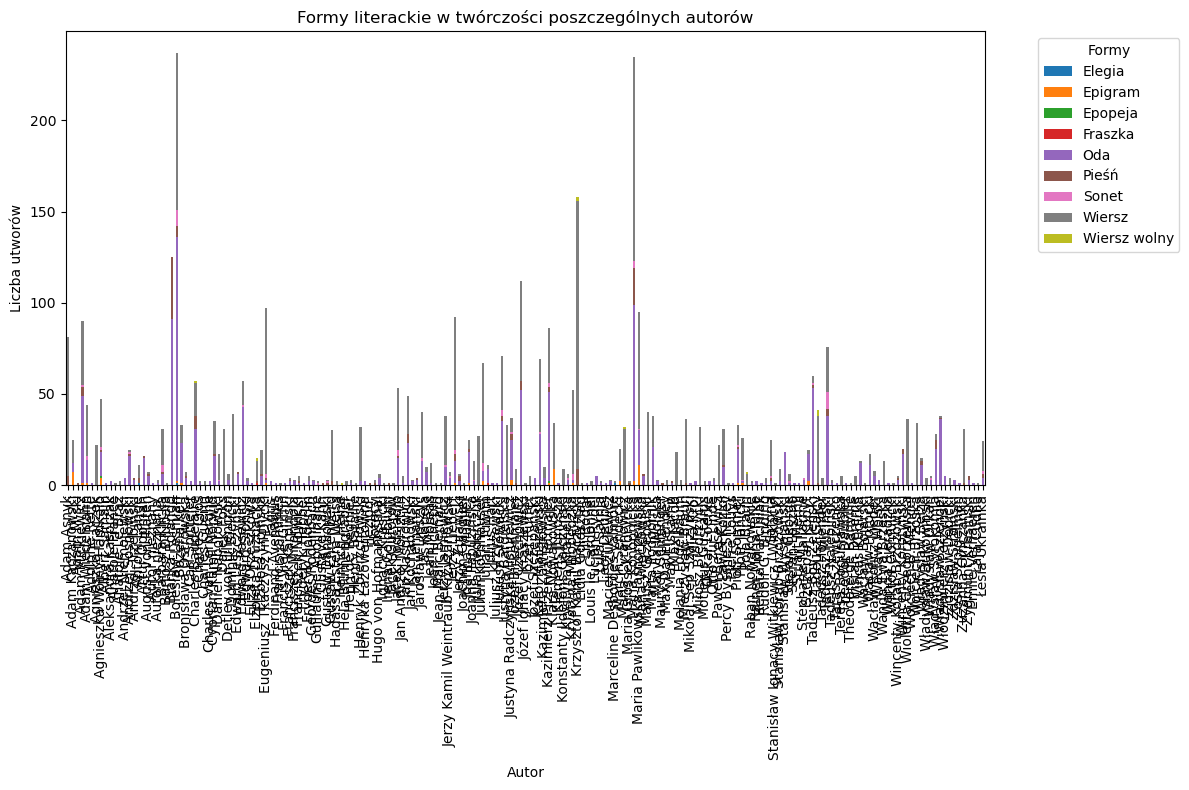

In [34]:
from itertools import combinations

motif_pairs = []
for motifs in data['motifs_list']:
    for combo in combinations(sorted(set(motifs)), 2):
        motif_pairs.append(combo)

motif_pair_counts = Counter(motif_pairs)
most_common_pairs = motif_pair_counts.most_common(10)
print("\nNajczęściej współwystępujące pary motywów:")
for pair, count in most_common_pairs:
    print(f"{pair}: {count}")

form_by_author = data.groupby(['author', 'form']).size().unstack(fill_value=0)
print("\nCzęstotliwość form literackich według autorów:")
print(form_by_author)

form_by_author.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Formy literackie w twórczości poszczególnych autorów')
plt.xlabel('Autor')
plt.ylabel('Liczba utworów')
plt.legend(title='Formy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
emotions_data = pd.read_csv('emotions_poems.csv')
emotion_stats = emotions_data['emotion_intensity'].describe()
print("Statystyczne Podsumowanie 'Emotions Intensity':")
print(emotion_stats)

Statystyczne Podsumowanie 'Emotions Intensity':
count    3814.000000
mean       -0.190482
std         0.447327
min        -0.998500
25%        -0.557400
50%         0.000000
75%         0.000000
max         0.996500
Name: emotion_intensity, dtype: float64


In [35]:
data.to_csv('analiza_poetycka.csv', index=False)